In [23]:
import numpy as np
from scipy import signal

if __name__ == '__main__':
    
    x = np.array([[1, 1, 1, 0, 0],
                  [0, 1, 1, 1, 0],
                  [0, 0, 1, 1, 1],
                  [0, 0, 1, 1, 0],
                  [0, 1, 1, 0, 0]],
                 dtype='float')
    
    w_k = np.array([[1, 0, 1],
                    [0, 1, 0],
                    [1, 0, 1],],
                   dtype='float')
    
    f = signal.convolve2d(x, w_k, 'valid')
    
    print (f)
    
 

[[4. 3. 4.]
 [2. 4. 3.]
 [2. 3. 4.]]


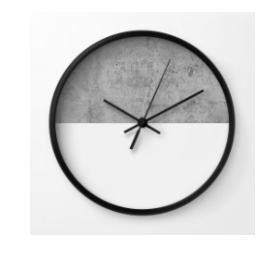

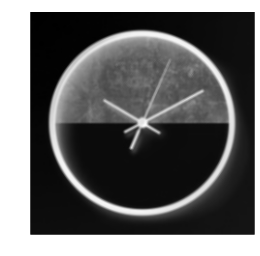

In [22]:
from skimage import io, color
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure
import pylab

def convolve2d(image, kernel):    
    kernel = np.flipud(np.fliplr(kernel))    # Flip the kernel
    output = np.zeros_like(image)            # convolution output
    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))   
    image_padded[1:-1, 1:-1] = image
    for x in range(image.shape[1]):     # Loop over every pixel of the image
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y,x]=(kernel*image_padded[y:y+3,x:x+3]).sum()        
    return output

img = io.imread('data//image//clock.jpg')    # Load the image
img = color.rgb2gray(img)       # Convert the image to grayscale (1 channel)
plt.imshow(img, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

# Convolve the sharpen kernel and the image
kernel = np.array([[0,-1,0],
                   [-1,5,-1],
                   [0,-1,0]])

image_sharpen = convolve2d(img,kernel)
plt.imshow(image_sharpen, cmap=plt.cm.gray)
plt.axis('off')
plt.show()
